#1. 데이터 준비
> 본 데이터는 캐글(https://www.kaggle.com/)에서 연습문제로 지원해 주는 데이터이다. 캐글은 2010년 4월에 설립된 공공 및 기업 데이터를 활용한 머신러닝 경진대회 플랫폼이다. 

> 우리가 분석할 내용은 titanic 호에서 생존한 사람들에 대해 분석해 보려 한다.
##1.1 데이터 열기
> 구글 드라이브에 데이터를 업로드한 후 읽어들여 보자

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

#강사님의 코드와 경로가 달라 수정
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/3. 파이프라인/data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##1.2. 데이터 백업
> 데이터를 분석하다 보면 여러 가공과정을 거치면서 원본 데이터가 손실될 수 있다. 다양한 방법으로 분석하다 보면 원본을 다시 가져다 사용하는 경우가 빈번하다. 데이터를 백업함으로써 원본 데이터를 유지할 수 있다.

In [4]:
df_titanic_backup = df.copy()

file_backup = '/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/3. 파이프라인/data/titanic_backup.csv'
df.to_csv(file_backup)

#백업으로저장된 csv파일 확인
df_titanic_backup = pd.read_csv(file_backup)
df_titanic_backup

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


> to_csv함수는 dataframe을 csv로 저장하는 기능을 한다. 위의 코드에서 백업한 df_backup dataframe을 이용하여  filepath위치에 titanic_backip.csv라는 파일을 만들어 데이터를 저장하는 기능을 한다. 실행 후 위의 위치로 이동하면 titanic_backip.csv파일이 생성된 것을 확인할 수 있다.

#2. 데이터 보기
##2.1 데이터의 기본 정보 확인
>info함수를 이용하여 데이터의 기본 정보를 확인할 수 있다.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> 설명달기

> dataframe.info()함수는 dataframe이 몇행 몇열로 구성되어 있는지 알려준다.

> 또, 각 column별 이름, null값이 아닌 행의 개수, 열의 데이터타입을 보여준다.

> 현재 Age에 277개, Cabin에 687개, Embarked에 2개의 null값이 들어있다.

##2.2 기초 통계 정보 확인
> 기초 통계 정보를 확인하여 추후 어떠한 방향으로 데이터를 분석할지 생각해 본다.

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> 설명달기

> dataframe.describe()함수는 각 column별 행의 수, 평균값, 표준편차, 최소값, 최대값, 25%, 50%, 75%같은 사분위수를 보여준다.

##2.3 데이터 확인

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


> 설명달기

> dataframe.head() 와 tail()은 각각 데이터프레임의 제일 위쪽 행과 제일 아래쪽행을 보여준다. 괄호속에 int형으로 몇개를 표시할지 넣을 수 있으며 기본 5개이다.

##2.4 정렬

> dataframe에서 행 정보를 index열 정보를 row또는 value로 표현하며 sort_values는 열 정보, 즉 feature정보를 기준으로 정렬하는 함수이다. 위의 코드에서는 타이타닉 정보에서 요금(Fare)를 기준으로 정렬을 한 것이다.

> axis 정보는 기본값이 0이므로 별도로 지정하지 않아도 되며 위와같이 명시화 시킬 수 도 있다. 대다수의 언어에서 정렬의 기본값은 오름차순이며 이 함수 역시 오름차순으로 정렬하게 된다.

In [9]:
#요금 기준 오름차순
df.sort_values(by=['Fare'], axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


In [10]:
#요금 기준 내림차순
df.sort_values(by=['Fare'], axis=0, ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


> Fare 순으로 정렬해 보니 679, 88, 27번의 요금이 3좌석에 대한 요금이라 판단되며, 결국 가격이 512.3292는 이상치가 아닌 정상적인 요금이라 판단할 수 있다.

In [11]:
df.sort_index().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


>sort_index함수는 index를 기준으로 정렬하는 함수이며 axis의 기본값은 0이다.

In [12]:
#열 이름 기준
df.sort_index(axis=1).head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


> axis=1을 설정하면 feature의 오름차순으로 정렬한 결과를 확인할 수 있다. 

> 이 함수는 현재 분석내용과 관계없이 sort_index가 무엇인지 알아보기 위해 사용한 것이다.

#3. 데이터 클린징
##3.1 결측치 확인

In [13]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

> 설명달기

> dataframe.count()함수는 각 column별 행의 개수를 보여준다. 전체 891행으로 되어있는데, 그보다 적은 행을 가진 column은 nan값을 가지고 있는 것이다

> 다음과 같이 count함수를 이용하여 결측치가 발생한 열을 확인할 수 있다. 확인결과 Age, Cabin(객실번호), Embarked(탑승 항구)에서 결측치가 발생한 것을 알 수 있었다. 같은 방법으로 notnull을 이용할 수도 있다.

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> 설명달기

> dataframe.isnull().sum()은 dataframe.isnull()하여 nan값, 즉 True로 출력된 값을 합쳐 column별로 보여주는 것이다. 이것으로 각 열의 nan데이터의 수를 알 수 있다.

##3.2 결측치 시각화
###3.2.1 heatmap
> heatmap은 데이터의 분포상태를 표현하는 시각화 도구이다. heatmap는 두 개의 카테고리 정보를 한눈에 알아 볼 수 있다는 장점이 있다.

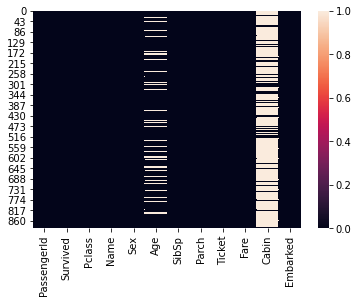

In [15]:
import seaborn as sns

sns.heatmap(df.isnull())

> heatmap을 이용하기 위해 seaborn 라이브러리를 등록하였다.
heatmap은 값의 변화를 온도로 표현하여 변화량을 확인할 수 있는 그래프로 현재 타이타닉 정보의 결측치 유무(isnull)를 전달하여 결측치가 나타나는 부분은 True(1)로 아닌부분은 False(0)으로 표현하게 된다.

> 실행결과 하얀 색으로 나타나는 부분이 결측치이며 이렇게 그래프를 이용하여 시각화 할 수 있다.

> 기본 정보는 위와 같이 나타난다.

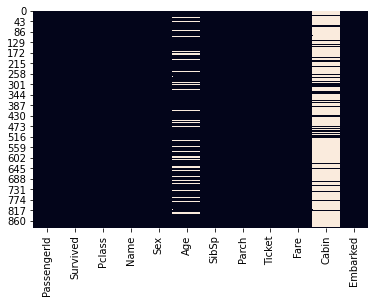

In [16]:
sns.heatmap(df.isnull(), cbar=False)

>cbar 옵션은 colorbar를 의미하는 것으로 기존 그래프에서 나타났던 왼쪽 기준표이며 cbar=False로 지정하게 되면 왼쪽 기준표를 숨길 수 있다.

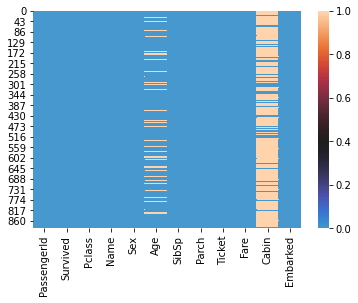

In [17]:
sns.heatmap(df.isnull(), center=0.4)

>center 옵션은 기준 위치를 지정하는 것으로 기준값보다 높으면 붉은색 계열로 기준값보다 낮으면 파란색 계열로 표시한다. 이는 heatmap이 온도를 표현한 그래프이기 때문에 그렇다. 기준이 되는 center는 검정색으로 나타난다.

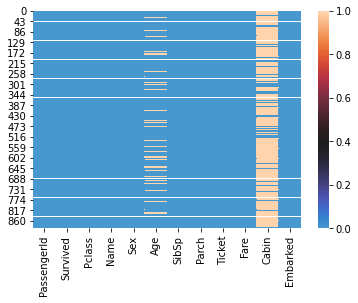

In [18]:
sns.heatmap(df.isnull(), center=0.4, linewidths=0.0001)

>linewidths는 각 데이터를 선으로 구분짓기 위해 사용하는 옵션으로 현재는 데이터가 너무 많아 수치를 작게 표현했다.

> 그 이외에도 여러 옵션이 있으며 다음 사이트를 참고하기 바란다.
* https://dsbook.tistory.com/51

###3.2.2 missingno
>위키 백과를 확인하면 아래와 같이 정의되어 있다.
* https://ko.wikipedia.org/wiki/%EB%AF%B8%EC%8B%B1%EB%85%B8

>미싱노(영어: MissingNo. 또는 MissingNO[1], 일본어: けつばん 케츠반[*])는 닌텐도의 《포켓몬스터 적·녹》에서 발견되었던 버그(glitch) 포켓몬이다. “결번(Missing Number)”을 의미하는 미싱노는 개발자인 게임 프리크가 에러 핸들러로 이용한 것으로, 존재하지 않는 포켓몬[2]의 데이터에 접근을 시도할 경우 나타난다. 프로그램된 세 개의 이벤트가 연속 실행되면 일종의 버그로서 미싱노를 만날 수 있게 된다. 닌텐도가 처음으로 미싱노를 공식적으로 언급한 것은 《닌텐도 파워》 1999년 5월호를 통해서였다.

> 미싱노가 나타나면 그래픽 에러가 나타나거나 플레이어의 아이템 메뉴 상의 여섯 번째 아이템이 다중 복제된다. 미싱노는 전략 가이드와 게임 매거진에서 소개되었으며, IGN에서 가장 유명한 게임 버그의 하나로 다룬 바 있다. 포켓몬 적·녹 시리즈의 팬들은 미싱노를 게임 카논(설정)의 일부로서 합리화하려 했으며, 이러한 소프트웨어 에러의 창의적 활용은 사회학자들의 연구 대상이 되기도 했다.[3]

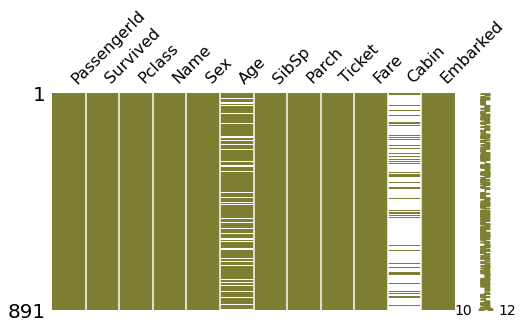

In [19]:
import missingno as msno
# msno.matrix(df)
# msno.matrix(df, figsize=(8,4))
msno.matrix(df, figsize=(8,4), color=(0.5, 0.5, 0.2))

>위와 같이 heatmap과 비슷한 결과를 얻을 수 있다.
* figsize : x, y의 크기를 지정하여 그래프를 표현한다.
* color : RGB로 표현되며 0~1사이의 값을 입력할 수 있다.

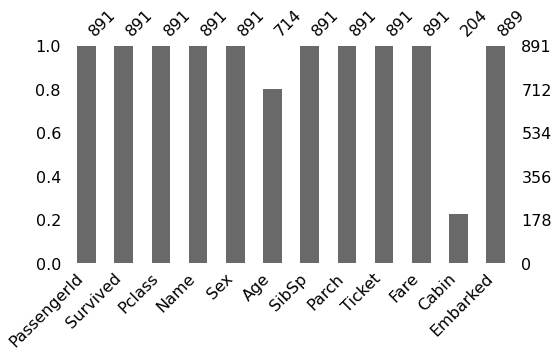

In [20]:
msno.bar(df, figsize=(8, 4))

> 위와 같이 막대바를 이용하여 결측치를 확인할 수 있다.

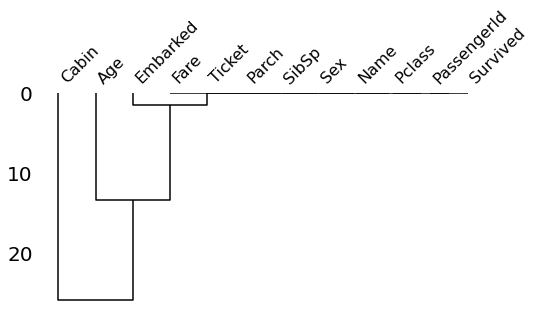

In [21]:
msno.dendrogram(df, figsize=(8, 4))

> dendrogram은 계층적 클러스터링 알고리즘을 활용한 누락 데이터 시작화 방법이다.

###3.2.3 결측치 제거
> 결측치가 가장많이 발생한 객실번호(Cabin)을 처리해 보자. 사실 객실번호가 분석에 큰 영향을 주지 않기 때문에 제거하면 그만이다. 하지만 최대한 살릴 수 있는 데이터가 존재한다면 살려서 사용해야 한다.

>결측치를 대체하는 방법은 다음과 같다.
* 평균값
* 중간값
* 최빈값

> 현재 결측치가 발생한 값은 객실번호이며 방을 101.3호실과 같은 방법으로 표현하는 것이 아니기 때문에 평균은 사용할 수 없다.
또한 방에 들어갈 수 있는 인원은 제한 적이기 때문에 중간값이나 최빈값 역시 사용할 수 없다.

####3.2.3.1 dropna 사용법 익히기

In [22]:
df_dropna_row = df.dropna()
df_dropna_row

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


> 설명달기

> df.dropna()함수는 dataframe에서 nan값을 가진 행을 삭제하는 기능을 가지고 있다.

In [23]:
df_dropna_col = df.dropna(axis=1)
df_dropna_col

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


> 설명달기

> df.dropna()에서 인자로 axis를 넘길 수 있는데, 0=행, 1=열 을 표현하며, 기본값은 0(행)이다.

> append함수를 이용하면 특정 데이터를 추가할 수 있으며 여기서는 타이타닉에 결측치를 추가하기 위해 사용했다.

In [24]:
import numpy as np
df_nan = df.append([np.nan])
df_nan
df_nan_dropna = df_nan.dropna(how='all')
df_nan_dropna

,0,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,NaN,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0.0,1.0,3.0,male,1.0,0.0,A/5 21171
1,NaN,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,2.0,1.0,female,1.0,1.0,PC 17599
2,NaN,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0.0,3.0,3.0,female,0.0,1.0,STON/O2. 3101282
3,NaN,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,4.0,1.0,female,1.0,1.0,113803
4,NaN,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0.0,5.0,3.0,male,0.0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0.0,887.0,2.0,male,0.0,0.0,211536
887,NaN,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0.0,888.0,1.0,female,0.0,1.0,112053
888,NaN,NaN,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2.0,889.0,3.0,female,1.0,0.0,W./C. 6607
889,NaN,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0.0,890.0,1.0,male,0.0,1.0,111369


>df_nan에는 첫번째 열, 마지막 행에 각각 nan으로 이루어진 열과 행이 있다.

> dropna에서 how옵션은 nan의 포함상태가 일부(any)이냐 모두(all)이냐에 따라 제거하는 기능을 한다. 기본 값은 ant이다.

> 위의 코드를 실행하면 dropna에서 axis의 기본값은 0이므로 행 중에서 데이터가 모두 nan인 값을 제거하게 된다.

In [25]:
import numpy as np
df_nan = df.append([np.nan])
# df_nan
# df_nan_dropna = df_nan.dropna(how='all')
df_nan_dropna = df_nan.dropna(how='all', axis=1)
df_nan_dropna

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0.0,1.0,3.0,male,1.0,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,2.0,1.0,female,1.0,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0.0,3.0,3.0,female,0.0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,4.0,1.0,female,1.0,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0.0,5.0,3.0,male,0.0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0.0,888.0,1.0,female,0.0,1.0,112053
888,NaN,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2.0,889.0,3.0,female,1.0,0.0,W./C. 6607
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0.0,890.0,1.0,male,0.0,1.0,111369
890,32.0,NaN,Q,7.7500,"Dooley, Mr. Patrick",0.0,891.0,3.0,male,0.0,0.0,370376


> 설명달기

> df.dropna(how='all', axis=1) 여기에서 axis=1이니 열을 제거한다는것을 알 수 있다. 그러나 how는 조건을 말하는데 'all' 즉, 열의 모든 행이 nan값인 행만 드롭하겠다는 뜻이다.

####3.2.3.2 cabin제거

In [26]:
cabin_count = df['Cabin'].notnull().sum()
print(cabin_count)


204


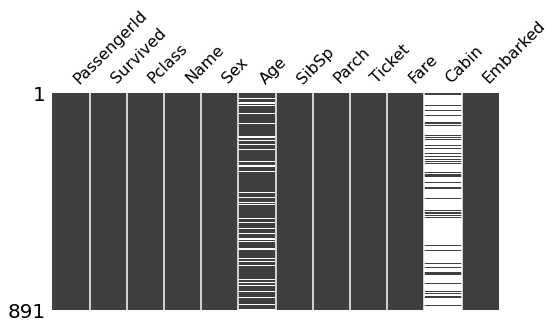

In [27]:
df_titanic_drop = df.dropna(thresh=cabin_count, axis=1)
msno.matrix(df_titanic_drop, figsize=(8, 4), sparkline=False)

> thresh에 넘겨준 인자보다 유효데이터의 수가 작은값은 드롭시킨다.
따라서, cabin_count에 +1을 해줘야 dropna가 작동되는것을 볼 수 있다.

> dropna 에서 thresh는 threshold를 의미하며, 경계를 뜻하게 된다. thresh는 인자로 넘겨준 숫자보다 유효데이터가 작은 값을 제거하는 기능을 한다.

> 위에서 cabin_count에 1을 더한 이유는 thresh가 작은 경우 feature를 drop하지 않으므로, 유효데이터에 1을 더하게 되엇다.

> sparkline은 오른쪽에 나타나는 기준표로 이를 제거하기위해 False를 지정했다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


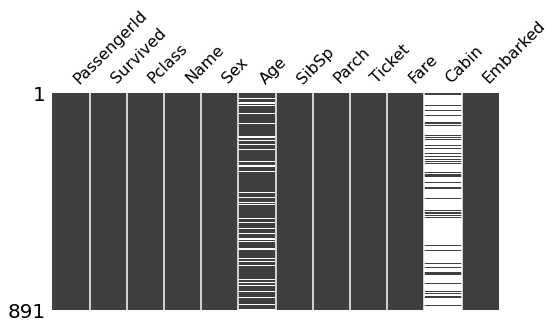

In [28]:
df_dropna_thresh = df.dropna(thresh=cabin_count, axis=1)
print(df.isna().sum())
#print(df_dropna_thresh.isna().sum())
msno.matrix( df_dropna_thresh , figsize=(8, 4), sparkline=False)

> 설명달기

> df.dropna(thresh=cabin_count, axis=1)에서 axis가 1이니 열을 삭제한다. 

> thresh는 임계값을 말하는데, 입력한 수보다 null값이 많다면 삭제한나는 뜻이다.
따라서, cabin행의 notnull의 수는 204, 204에 +1하여 nan값이 205개 이상이면 그 열을 삭제한다.

> 이후 print(df_dropna_thresh.isna().sum()) 을 해보면 687로 나와야하는 cabin열이 사라진것을 볼 수 있다.

###3.2.4 결측치 치환
>이번에는 결측치의 치환에 대해 알아보자. 결측치 치환 시 다음과 같은 방법들을 적용할 수 있다.
* 연관성 찾기
* 대표값 찾기

####3.2.4.1 탑승 항구(Embarked)

In [29]:
print(df_dropna_thresh[df_dropna_thresh['Embarked'].isna()])
# df_dropna_thresh[50:70]
df_dropna_thresh[820:840]

     PassengerId  Survived  Pclass  ...  Fare Cabin  Embarked
61            62         1       1  ...  80.0   B28       NaN
829          830         1       1  ...  80.0   B28       NaN

[2 rows x 12 columns]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.00,1,1,12749,93.5000,B69,S
821,822,1,3,"Lulic, Mr. Nikola",male,27.00,0,0,315098,8.6625,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.00,0,0,19972,0.0000,NaN,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.00,0,1,392096,12.4750,E121,S
824,825,0,3,"Panula, Master. Urho Abraham",male,2.00,4,1,3101295,39.6875,NaN,S
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,NaN


> 설명달기

> embarked (탑승항구)가 nan값인 인원 2명중 인덱스가 829번인 사람을 보기위해 820~840번을 슬라이싱했다.

> 승선한 항구의 정보가 경츨치인 데이터를 확인해 보았더니 위와 같이 2개의 정보가 나타났다. passenger Id가 연결된 정보가 아니니 연관성이 없어 보이고 ticket이 같은 번호이니 같은 위치에서 입항했을 것으로 유추된다.

> passengerId는 같은 항구에서 순차적으로 나타나지 않을까라는 생각에 다음과 같이 데이터를 확인해 보았다.

In [30]:
df_dropna_thresh.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

> Embarked는 object형으로 나온다

In [31]:
# df_dropna_thresh.dtypes
df_dropna_thresh[df_dropna_thresh['Ticket']=='113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


> 설명달기

> df_dropna_thresh에서 티켓번호가 113572 인 사람을 찾아봤다.

> ticket 정보가 같은 정보를 가지고 있어 항구와 연관성이 있지 않을까라는 새각에 위와 같이 ticket정보를 입력했더니 아무 결과도 나타나지 않았다.


> 따라서 문자열로 표현하여 위와 같은 결과를 얻게 되었다.

> 이렇게 확인해보니 결측치가 발생한 두명의 정보만 나타나는 것을 알 수 있다. 따라서 이 정보로는 치환이 불가능 하다.

In [32]:
df_dropna_thresh[df_dropna_thresh['Fare']==80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


> 설명달기

> 이용요금으로 검색해봐도 탑승항구가 불명인 둘밖에 나오지 않는다.

S    644
C    168
Q     77
Name: Embarked, dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


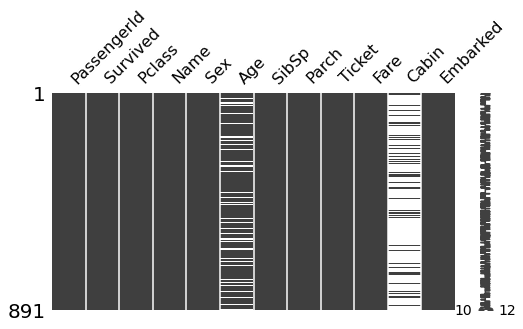

In [33]:
print(df_dropna_thresh['Embarked'].value_counts())
df_dropna_thresh['Embarked']=df_dropna_thresh['Embarked'].fillna('S')
print(df_dropna_thresh.isnull().sum())
msno.matrix(df_dropna_thresh, figsize=(8, 4))

In [36]:
df_embarked = pd.DataFrame( df_dropna_thresh['Embarked'].value_counts())
print(df_embarked)

   Embarked
S       646
C       168
Q        77


####3.2.4.1.2 탑승항구 결측치 치환 자동화

In [34]:
#Embarked의value_counts()결과는 위처럼 나온다.
#이를 하나의 데이터프레임으로 만든다.
df_embarked = pd.DataFrame( df_dropna_thresh['Embarked'].value_counts())

#또, 인덱스로 있는 탑승항구이름을 새로운 컬럼으로 만들어준다.
df_embarked['idx'] = df_embarked.index

#가장 많은 값을 가지고있는 탑승항구 이름을 표시한다.
df_embarked[df_embarked['Embarked']==df_embarked['Embarked'].max()]['idx']

S    S
Name: idx, dtype: object

> 설명달기

> 탑승 인원중 가장 많이 사용하는 S로 nan값을 채워준다.

> 이로써 cabin의 nan의 수는 0이된것을 확인할 수 있다.

> 설명달기

> S,C,Q 객실중 가장많이 사용된 객실은 S객실이다.

####3.2.4.2 나이(Age)
> 나이는 연관성을 확인하는 것이 어려움으로 단순하게 평균을 이용하여 결측치를 치환해 보자

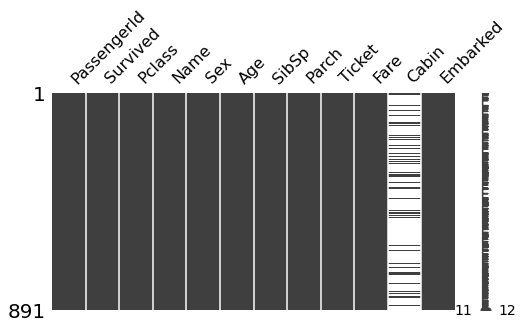

In [37]:
ageMean = df_dropna_thresh['Age'].mean()
df_dropna_thresh['Age'] = df_dropna_thresh['Age'].fillna(ageMean)
msno.matrix(df_dropna_thresh, figsize=(8,4))

> 이와 같이 상황에 따라 다양한 방법으로 데이터를 클린징 할 수 있다.

In [38]:
file_backup = '/content/drive/MyDrive/Colab Notebooks/Lec4_BigData/3. 파이프라인/datatitanic_cleaning.csv'
df_dropna_thresh.to_csv(file_backup)

> 마지막으로 지금까지 진행된 내용을 파일로 저장해 두자